## Reading the Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


## Data Cleaning

In [4]:
df.eq(0).sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [5]:
df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = \
df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].replace(0, np.nan)

<AxesSubplot:>

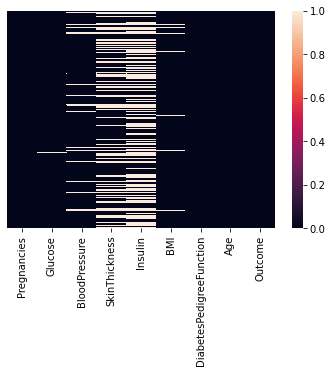

In [6]:
sns.heatmap(df.isnull(), yticklabels=False)

In [7]:
df.fillna(df.mean(), inplace=True)

<AxesSubplot:>

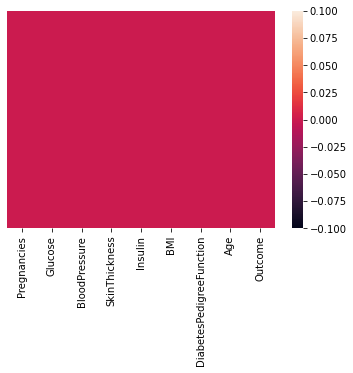

In [8]:
sns.heatmap(df.isnull(), yticklabels=False)

In [9]:
df.eq(0).sum()

Pregnancies                 111
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                       0
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

## EDA

<AxesSubplot:>

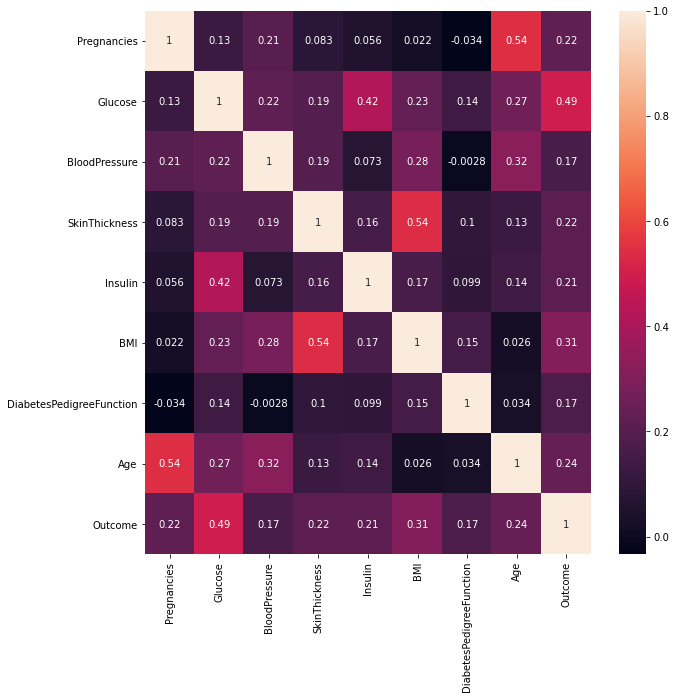

In [11]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True)

In [12]:
X = df[['Glucose', 'BMI', 'Age']]
y = df['Outcome']

## Algorithms

In [13]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

In [14]:
logReg = LogisticRegression()

In [16]:
cross_val_score(logReg, X, y, cv=10, scoring='accuracy').mean()

0.7669856459330144

In [17]:
from sklearn.neighbors import KNeighborsClassifier

In [18]:
ks = list(range(1, 50, 2))
ks

[1,
 3,
 5,
 7,
 9,
 11,
 13,
 15,
 17,
 19,
 21,
 23,
 25,
 27,
 29,
 31,
 33,
 35,
 37,
 39,
 41,
 43,
 45,
 47,
 49]

In [21]:
cvScores = []

for k in ks:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X, y, cv=10, scoring='accuracy').mean()
    cvScores.append([k, score])

In [22]:
cvScores

[[1, 0.6835099111414901],
 [3, 0.7187457279562542],
 [5, 0.7291011619958988],
 [7, 0.7434381408065618],
 [9, 0.7395762132604238],
 [11, 0.7539302802460697],
 [13, 0.7630553656869447],
 [15, 0.7604237867395762],
 [17, 0.7669343814080657],
 [19, 0.7721462747778537],
 [21, 0.7669343814080655],
 [23, 0.7682159945317839],
 [25, 0.7630382775119618],
 [27, 0.7682843472317157],
 [29, 0.7630724538619276],
 [31, 0.7670027341079974],
 [33, 0.765686944634313],
 [35, 0.7656869446343132],
 [37, 0.7669856459330144],
 [39, 0.7630724538619276],
 [41, 0.7617737525632263],
 [43, 0.7644053315105948],
 [45, 0.7604921394395079],
 [47, 0.7643711551606289],
 [49, 0.7578776486671224]]

## Finalising the Algorithm

In [23]:
finalKnn = KNeighborsClassifier(n_neighbors=19)
finalKnn.fit(X, y)

KNeighborsClassifier(n_neighbors=19)